In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as opt

In [33]:
df = pd.read_csv("../../data/all_world_indices_clean.csv")
df_spx = df[["Date", "SPX Index"]]
df_spx["Date"] = pd.to_datetime(df_spx["Date"], format='%d/%m/%Y')
df_spx = df_spx.sort_values(by="Date")
df_spx.reset_index(inplace=True)
df_spx

/home/james/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,Date,SPX Index
0,5087,2001-07-02,1461.48665
1,5086,2001-07-03,1455.20453
2,5085,2001-07-04,1455.20453
3,5084,2001-07-05,1458.59553
4,5083,2001-07-06,1406.81791
...,...,...,...
5083,4,2020-12-24,3039.53049
5084,3,2020-12-25,3039.53049
5085,2,2020-12-28,3060.26544
5086,1,2020-12-29,3044.46986


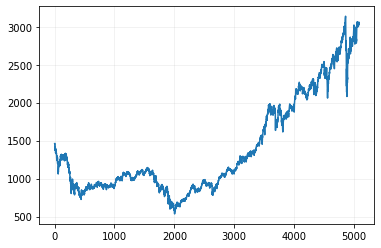

In [46]:
series_array = np.array(df_spx["SPX Index"])
plt.plot(series_array)
plt.grid(alpha=0.2)

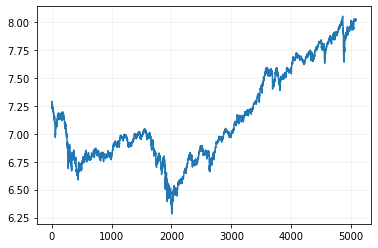

In [79]:
series_array = np.log(df_spx["SPX Index"])
plt.plot(series_array)
plt.grid(alpha=0.2)

In [103]:
## chunking - lets use slightly largers chunk for now 
s_ex = 2

def gen_interval(series, s):    
    
    l = series.shape[0]
    k_set = range(int(l / 2))
    chunk_list = []

    for k in k_set:
        o = 1 + s*(k - 1)
        c = s * (k + 1)
        chunk_list.append((o, c))

    return chunk_list[1:-1]

chunks = gen_interval(series_array, s_ex)

## shift close of last value
print(chunks)

[(1, 4), (3, 6), (5, 8), (7, 10), (9, 12), (11, 14), (13, 16), (15, 18), (17, 20), (19, 22), (21, 24), (23, 26), (25, 28), (27, 30), (29, 32), (31, 34), (33, 36), (35, 38), (37, 40), (39, 42), (41, 44), (43, 46), (45, 48), (47, 50), (49, 52), (51, 54), (53, 56), (55, 58), (57, 60), (59, 62), (61, 64), (63, 66), (65, 68), (67, 70), (69, 72), (71, 74), (73, 76), (75, 78), (77, 80), (79, 82), (81, 84), (83, 86), (85, 88), (87, 90), (89, 92), (91, 94), (93, 96), (95, 98), (97, 100), (99, 102), (101, 104), (103, 106), (105, 108), (107, 110), (109, 112), (111, 114), (113, 116), (115, 118), (117, 120), (119, 122), (121, 124), (123, 126), (125, 128), (127, 130), (129, 132), (131, 134), (133, 136), (135, 138), (137, 140), (139, 142), (141, 144), (143, 146), (145, 148), (147, 150), (149, 152), (151, 154), (153, 156), (155, 158), (157, 160), (159, 162), (161, 164), (163, 166), (165, 168), (167, 170), (169, 172), (171, 174), (173, 176), (175, 178), (177, 180), (179, 182), (181, 184), (183, 186), (

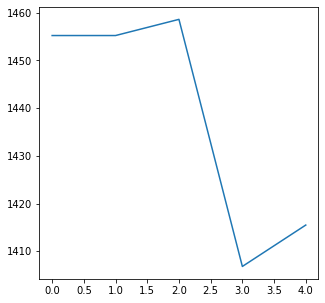

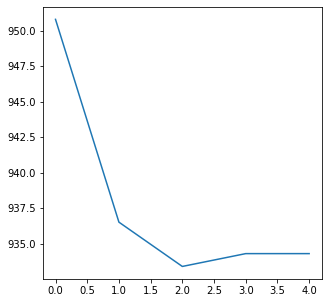

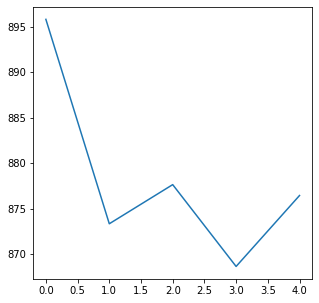

In [52]:
## visualise three of the chunks
for i in [0, 100, 200]:
    fig = plt.figure(figsize=(5, 5))
    plt.plot(series_array[chunks[i][0]: chunks[i][1]])
    plt.show()

In [ ]:
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

/home/james/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


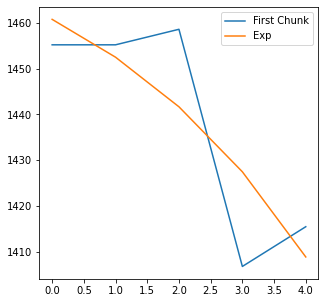

In [64]:
## detrending

## first, lets try fit exponential for the very first chunk
y = series_array[chunks[0][0]: chunks[0][1]]
x = np.arange(series_array[chunks[0][0]: chunks[0][1]].shape[0])

popt, pcov = opt.curve_fit(exp_decay, x, y, maxfev=2500)
a_fit, b_fit, c_fit = popt 

fig = plt.figure(figsize=(5, 5))
plt.plot(x, y, label="First Chunk")
plt.plot(x, exp_decay(x, a_fit, b_fit, c_fit), label="Exp")
plt.legend()
plt.show()

In [71]:
## structure to hold the coefficients for each of the fits 
coeff_list = []

for n, (i, j) in enumerate(chunks):
    y = series_array[chunks[n][0]: chunks[n][1]]
    x = np.arange(series_array[chunks[n][0]: chunks[n][1]].shape[0])
    print(n)
    popt, pcov = opt.curve_fit(exp_decay, x, y, maxfev=5000)
    coeff_list.append(popt)

print(coeff_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
/home/james/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/james/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
2

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 5000.

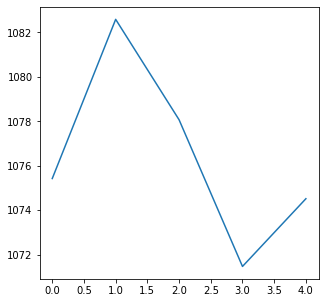

In [78]:
## failing case for exponential decay
fig = plt.figure(figsize=(5, 5))
plt.plot(series_array[chunks[501][0]: chunks[501][1]])
plt.show()

In [81]:
def linear_form(x, a, b):
    return a * x + b

In [95]:
## structure to hold the coefficients for each of the fits 
coeff_list = []

for n, (i, j) in enumerate(chunks):
    y = series_array[chunks[n][0]: chunks[n][1]]
    x = np.arange(series_array[chunks[n][0]: chunks[n][1]].shape[0])
    popt, pcov = opt.curve_fit(linear_form, x, y, maxfev=50)
    coeff_list.append(popt)

print(coeff_list)
# print(series_array[chunks[2000][0]: chunks[2000][1]])

/home/james/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
[array([1.16377289e-03, 7.28251382e+00]), array([-0.01499849,  7.2781809 ]), array([-0.01560985,  7.25281852]), array([0.019021  , 7.22878747]), array([-3.25768421e-03,  7.25871237e+00]), array([-0.00739765,  7.25060286]), array([-0.0093391 ,  7.24217557]), array([-5.99923133e-03,  7.21615330e+00]), array([0.00918961, 7.21130363]), array([3.03891112e-03, 7.22730262e+00]), array([-1.32350983e-03,  7.23401279e+00]), array([-0.00752168,  7.23236817]), array([-6.08772488e-03,  7.22120037e+00]), array([-5.32704649e-03,  7.20136567e+00]), array([-6.45201065e-03,  7.19490890e+00]), array([-0.0092338 ,  7.17848973]), array([-2.77021139e-03,  7.15755492e+00]), array([-4.90559050e-03,  7.15544423e+00]), array([0.01135589, 7.14377514]), array([-0.00965221,  7.17167051]), array([-0.01664474,  7.15313371]), array([5.02383683e-

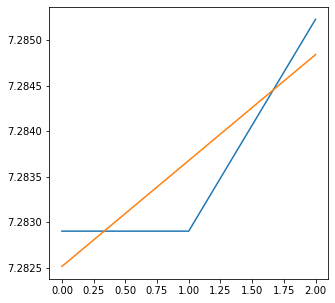

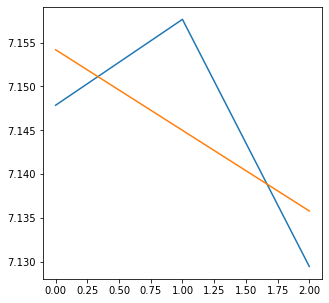

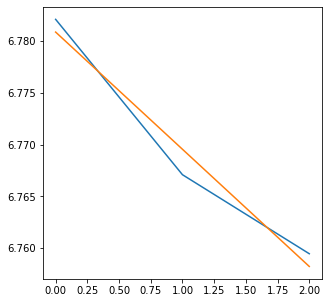

In [99]:
## visualise the linear curve fit
for i in [0, 100, 200]:
    x = np.arange(series_array[chunks[i][0]: chunks[i][1]].shape[0])
    a_fitted, b_fitted = coeff_list[i]
    fig = plt.figure(figsize=(5, 5))
    plt.plot(x, series_array[chunks[i][0]: chunks[i][1]])
    plt.plot(x, linear_form(x, a_fitted, b_fitted))
    plt.show()

In [104]:
## define detrended log returns
## first we need to define the deviation from the fitting function 

deviations = np.zeros(series_array.shape[0])

for ind, (i, j) in enumerate(chunks):
    a_fitted, b_fitted = coeff_list[ind]
    for z in range(i, j + 1):
        deviations[z] = series_array[z] - linear_form(z, a_fitted, b_fitted)

print(deviations)

[ 0.00000000e+00 -7.75848608e-04 -1.93962150e-03 ... -1.72775034e+01
 -1.72860776e+01  0.00000000e+00]


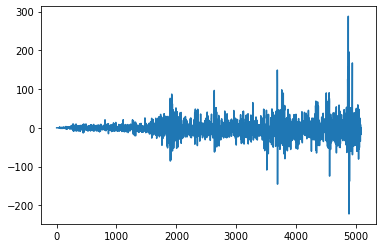

In [105]:
plt.plot(deviations)

In [108]:
deviations_shifted = np.roll(deviations, 1)
dlrs = (deviations_shifted - deviations)[1:] 
print(dlrs)

[ 7.75848608e-04  1.16377289e-03 -5.39834817e-02 ... -3.39929895e-03
  8.57417204e-03 -1.72860776e+01]


In [ ]:
## local variance
def sig_sq(s, dt, dlrs, t):
    n_s = s / dt
    for k in range(- n_s / 2, n_s / 2):
         